# Descarga de un soplo (c)


## Modelo 
Este modelo determina el ancho de una nube originida por un soplo (puff) a una distancia determinada.




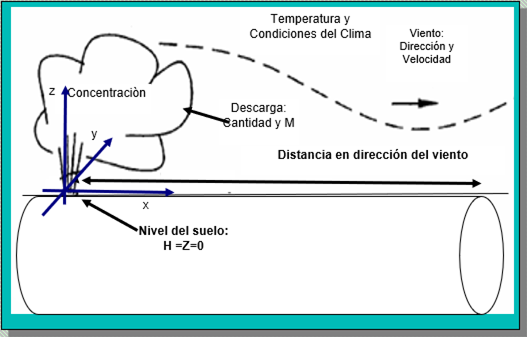

## Variables
|Variable|Significado|Unidades|
|------|------|------|
|H|		Altura de la chimenea||			
|y|		Distancia en dirección perpendicular al viento||			
|z|		Distancia sobre el nivel del suelo	||		
|a, ..., d	|Constantes para determinar los coeficientes de dispersión, en función de las condiciones||				
|R|		Constante de los gases		|0.082	L atm/gmol K|
|u|		Velocidad del viento		|	m/s|
|T|		Temperatura de descarga	|		K|
|G|		Descarga		|	kg|
|C*	|	Concentración del soplo		|	ppm|
|x|		Distancia en dirección del viento		|	m|
|Condiciones		|A, B, C,D,E,F	|	F	|
|PM|		Peso Molecular del gas	|		g/gmol|




## Variables a calcular

|Variable|Significado|Unidades|
|------|------|------|
|$\sigma_y$, $\sigma_y$|		Coeficientes de dispersión en las direcciones y, z			|m|
|C|		Concentración en la pluma	|		kg/m^3|


## Incógnitas


|Variable|Significado|Unidades|
|------|------|------|
|x-ut|	Ancho de la nube|		m|
|w|	Espesor de la nube		|m|
|t|	Tiempo en que alcanza w		|s|



### Consideraciones
-La descarga se hace a nivel del suelo: H = y = z = 0

-El modelo considera que $\sigma_x$  = $\sigma_y$







## Desarrollo y ecuaciones

El modelo de soplo (puff) describe una descarga instántanea de un gas. Este modelo depende de las condiciones atmosféricas (si), la altura de la descarga (z) y de la chimenea (H), la velocidad del viento (u).

- Ecuación 1.  ${C}(x,y,z,t)=\frac{G}{(2\pi)^{\frac{3}{2}}\sigma_x \sigma_y \sigma_z }exp[\frac{-1}{2}(\frac{y}{\sigma_y})^2]*(exp[\frac{-1}{2}(\frac{z-H}{\sigma_Z})^2]+exp[\frac{-1}{2}(\frac{z+H}{\sigma_Z})^2])$


Para las condiciones descritas: H=y=z=0, la ecuación 1 se reduce a :

- Ecuación 2.  ${C}(x,0,0)=\frac{G}{(2\pi)^{\frac{3}{2}}\sigma_x \sigma_y \sigma_z }$



Se requiere que la ecuación esté en función del punto de descarga por lo que se tiene:

- Ecuación 3.  $exp[\frac{-1}{2}(\frac{x-ut}{\sigma_x})^2]$

Multiplicando la ecuación 2 por ecuación 3:

- Ecuación 4. ${C}(x,0,0)=\frac{G}{(2\pi)^{\frac{3}{2}}\sigma_x \sigma_y \sigma_z }exp[\frac{-1}{2}(\frac{x-ut}{\sigma_x})^2]$

Despejando (x - ut) (distancia en dirección del viento - distancia recorrida) que representa el ancho del soplo:

- Ecuación 5. $x-ut=\sigma_y \sqrt{ln(\frac{C \sqrt{2}\pi^{3/2}\sigma_y^2 \sigma_z}{G})^{-2}}$

Como se esta ingresando una C* en ppm se requiere una conversión a través de la ecuación de gas ideal:

- Ecuación 6. $C=\frac{1}{R}\frac{M}{T}C*$

Para obtener los parámetros sy y sz se usan las siguientes ecuaciones generales

- Ecuación 7. $\sigma_y=cxa^{1/2}$, 
$\sigma_z=dxb^{1/2}$

Para obtener el espesor:


- Ecuación 8. $w=2(x-ut)$

Y para conocer el tiempo en el que se alcanzan estas dimensiones:


$t=\frac{w}{u}$

## Resultados


In [93]:
#Datos

R=0.082#Latm/ mol K
u=2 #m/s
T= 298#k
P= 1 #atm
PM=30 #kg/kmol
G=1 #kg
C=0.5#ppm
x=5000#m
PM=30#g/mol




Se calcula la C:

In [94]:
C=1/R*PM/T*C*10**-6
print("C= "+ str(C)+" kg/m^3")

C= 6.138484203633983e-07 kg/m^3


Se calculan los coeficientes de dispersión, el ancho y espesor del soplo y el tiempo en el que se tendràn estas condiciones :

In [95]:
import numpy as np
import math
V=0.1#m/S
PasquillGifford=np.array(["A","B","C","D","E","F"])

parametro_sigma_y=np.array([0.18,0.14,0.1,0.06,0.04,0.02])
sigma_y=parametro_sigma_y*x**0.92
parametro_sigma_z=np.array([0.6,0.53,0.34,0.15,0.1,0.05])
zElevacion=np.array([0.75,0.73,0.71,0.7,0.65,0.61])
sigma_z=parametro_sigma_z*x**zElevacion


a=-2*np.log((C*1.4142*(np.pi**1.5)*sigma_y**2*sigma_z)/G)
b=sigma_y*np.sqrt(-2*np.log(C*1.4142*(np.pi**1.5)*sigma_y**2*sigma_z/G))

for i in a:
    if i>0:
        a=b
        w=2*b
        t=w/u
    else:
        a=0
        
      
        
print('{:^10}''{:^10}''{:^10}''{:^10}''{:^10}''{:^10}'.format('Condiciones', 'sy[m]','sz[m]','x-ut[m]','w[m]','t[s]'))

for i in range(len(PasquillGifford)):
    
    print('{:^10}''{:^10.1f}''{:^10.3f}'' {:^10.3f}''{:^10.3f}''{:^10.3f}'.format(PasquillGifford[i],sigma_y[i],sigma_z[i],a[i],w[i],t[i]))



Condiciones  sy[m]     sz[m]    x-ut[m]     w[m]      t[s]   
    A       455.3    356.762      nan       nan       nan    
    B       354.1    265.781      nan       nan       nan    
    C       253.0    143.796      nan       nan       nan    
    D       151.8     58.260      nan       nan       nan    
    E       101.2     25.371      nan       nan       nan    
    F        50.6     9.023     105.942   211.884   105.942  


C:\Users\dsaga\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
